In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import contingency
from datetime import datetime

In [17]:
df1 = pd.read_csv('yt_emotions_2.csv')
df2 = pd.read_csv('yt_emotions_3.csv')
df3 = pd.read_csv('yt_emotions_4.csv')

In [58]:
yt = pd.read_csv("youtubers.csv")#.drop(yt.columns[0], axis = 1)
yt = yt.drop([yt.columns[0], yt.columns[-1]], axis = 1)

In [64]:
sex = yt[['youtuber', 'sex']]
sex['youtuber'] = sex.get("youtuber").apply(str.lower)
sex.head()

/var/folders/5f/407hvk851c3bwnc43p82_ccr0000gn/T/ipykernel_51994/253635301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex['youtuber'] = sex.get("youtuber").apply(str.lower)


,youtuber,sex
0,mrbeast gaming,M
1,markiplier,M
2,jacksepticeye,M
3,techno gamerz,M
4,dream,M


In [24]:
df1.shape[0] + df2.shape[0] + df3.shape[0]

20585

In [72]:
combined = pd.concat([df1, df2, df3])
combined = combined.drop(combined.columns[0], axis = 1)

In [73]:
combined.head()

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion
0,MrBeast Gaming,definitely videos pulls someone loosing judge ...,2022-04-26T19:21:41Z,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2
1,MrBeast Gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28T04:38:01Z,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1
2,MrBeast Gaming,person who’s family owns dairy farm works dfa ...,2022-07-15T02:39:50Z,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2
3,MrBeast Gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31T22:34:41Z,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2
4,MrBeast Gaming,going lie chandler karl’s farm really good wou...,2022-04-19T17:38:46Z,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2


In [74]:
combined['Date'] = [i[:10] for i in combined['Date']]

In [75]:
combined.head()

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion
0,MrBeast Gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2
1,MrBeast Gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1
2,MrBeast Gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2
3,MrBeast Gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2
4,MrBeast Gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2


In [76]:
combined.shape[0] - combined[combined.get('Youtuber')=='Youtuber'].shape[0]

20507

In [77]:
combined = combined[combined.get('Youtuber')!= 'Youtuber']

In [78]:
date_format ='%Y-%m-%d'

combined['Date'] = [datetime.strptime(i, date_format) for i in combined['Date']]

In [79]:
combined['Youtuber'] = combined.get("Youtuber").apply(str.lower)

In [80]:
print(type(combined.iloc[0]['Date']))# convert whole column to date time
print(combined.shape[0])
combined.head()


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
20507


,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2


In [88]:
df = pd.merge(combined, sex, left_on = 'Youtuber', right_on = 'youtuber').drop(columns = ['youtuber'])
df.head()

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion,sex
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2,M
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1,M
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2,M
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2,M
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2,M


In [191]:
df.shape

(20507, 8)

In [91]:
male = df[df.get('sex') == "M"]
female = df[df.get('sex')=='F']

In [93]:
male_pos = male[male.get('Emotion') == 2]
male_neu = male[male.get('Emotion') == 1]
male_neg = male[male.get('Emotion') == 0]

female_pos = female[female.get('Emotion') == 2]
female_neu = female[female.get('Emotion') == 1]
female_neg = female[female.get('Emotion') == 0]

<Axes: title={'center': 'Average Sentiment of Comments over Time'}, xlabel='Date', ylabel='<- sentiment (negative to positive) ->'>

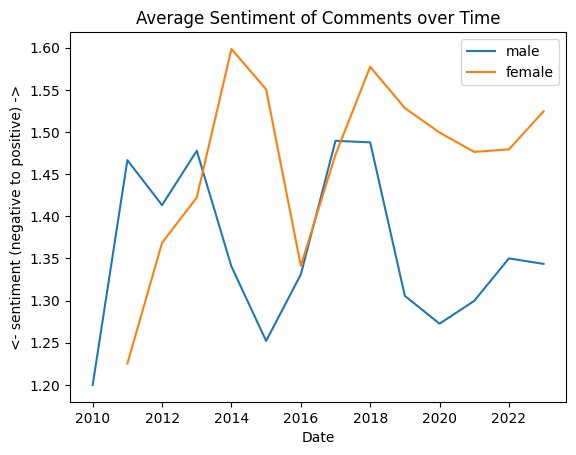

In [185]:
ax = male.groupby(male.Date.dt.year).mean()['Emotion'].plot(label = 'male', 
                                                            legend = True,
                                                            ylabel = '<- sentiment (negative to positive) ->',
                                                           title = 'Average Sentiment of Comments over Time')
female.groupby(female.Date.dt.year).mean()['Emotion'].plot(ax = ax, 
                                                           label = 'female', 
                                                           legend = True)

<Axes: xlabel='Date'>

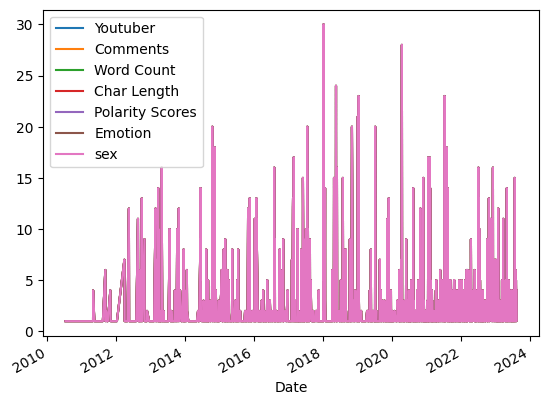

In [96]:
male_pos.groupby('Date').count().plot()

<Axes: title={'center': 'Comment Sentiment Over Time, M'}, xlabel='Date'>

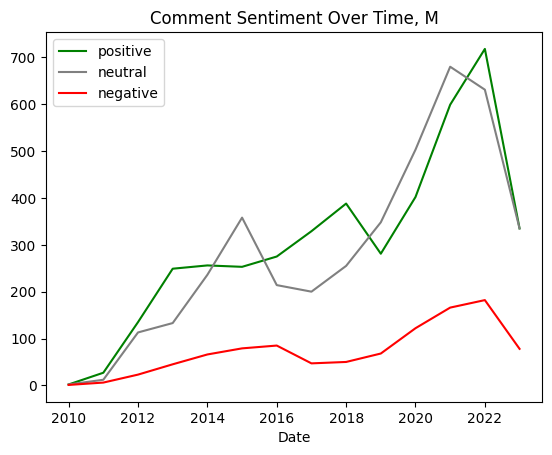

In [166]:
ax = male_pos.groupby(male_pos.Date.dt.year).count()['Youtuber'].plot(label = 'positive', 
                                                                      legend = True,
                                                                      color = 'green',
                                                                      title = 'Comment Sentiment Over Time, M'
                                                                     )
male_neu.groupby(male_neu.Date.dt.year).count()['Youtuber'].plot(label = 'neutral',
                                                                 legend = True,
                                                                 color = 'grey',
                                                                 ax = ax)
male_neg.groupby(male_neg.Date.dt.year).count()['Youtuber'].plot(label = 'negative',
                                                                legend = True,
                                                                color = 'red',
                                                                ax = ax)

<Axes: title={'center': 'Comment Sentiment Over Time, F'}, xlabel='Date'>

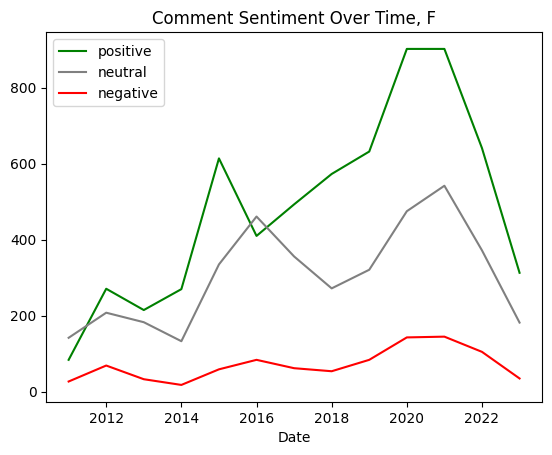

In [167]:
ax = female_pos.groupby(female_pos.Date.dt.year).count()['Youtuber'].plot(label = 'positive', 
                                                                      legend = True,
                                                                      color = 'green',
                                                                      title = 'Comment Sentiment Over Time, F'
                                                                     )
female_neu.groupby(female_neu.Date.dt.year).count()['Youtuber'].plot(label = 'neutral',
                                                                 legend = True,
                                                                 color = 'grey',
                                                                 ax = ax)
female_neg.groupby(female_neg.Date.dt.year).count()['Youtuber'].plot(label = 'negative',
                                                                legend = True,
                                                                color = 'red',
                                                                ax = ax)

<Axes: title={'center': 'Positive Comments Over Time'}, xlabel='Date'>

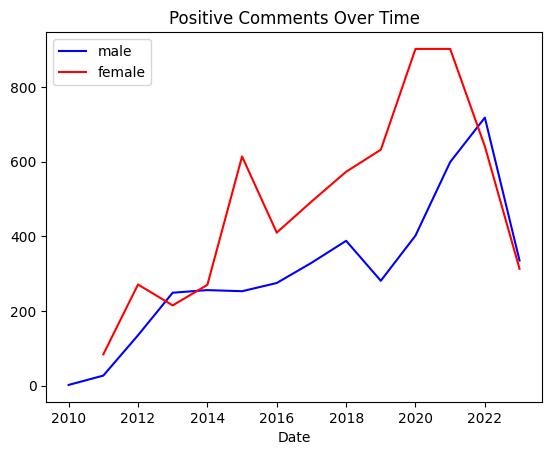

In [160]:
ax = male_pos.groupby(male_pos.Date.dt.year).count()['Youtuber'].plot(label = 'male', 
                                                                      legend = True,
                                                                      color = 'blue',
                                                                      title = 'Positive Comments Over Time'
                                                                     )
female_pos.groupby(female_pos.Date.dt.year).count()['Youtuber'].plot(ax=ax, 
                                                                     legend = True, 
                                                                     color = 'red',
                                                                     label = 'female'
                                                                     )


<Axes: title={'center': 'Neutral Comments Over Time'}, xlabel='Date'>

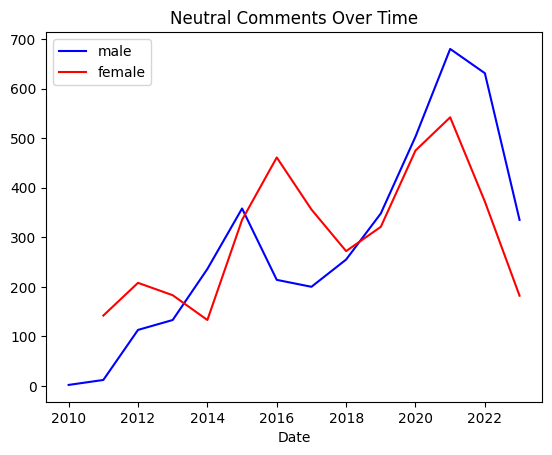

In [161]:
ax = male_neu.groupby(male_neu.Date.dt.year).count()['Youtuber'].plot(label = 'male', 
                                                                      legend = True,
                                                                      color = 'blue',
                                                                      title = 'Neutral Comments Over Time'
                                                                     )
female_neu.groupby(female_neu.Date.dt.year).count()['Youtuber'].plot(ax=ax, 
                                                                     legend = True, 
                                                                     color = 'red',
                                                                     label = 'female'
                                                                     )


<Axes: title={'center': 'Negative Comments Over Time'}, xlabel='Date'>

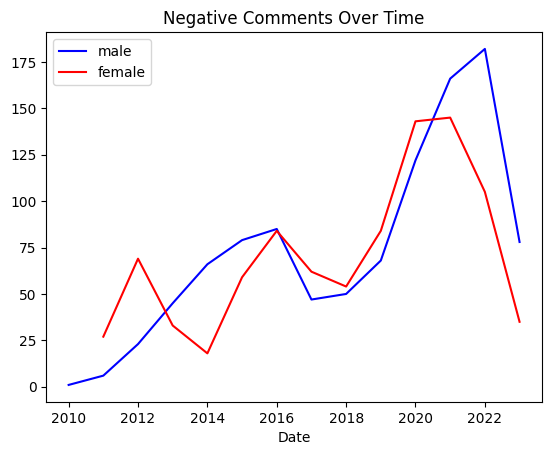

In [162]:
ax = male_neg.groupby(male_neg.Date.dt.year).count()['Youtuber'].plot(label = 'male', 
                                                                      legend = True,
                                                                      color = 'blue',
                                                                      title = 'Negative Comments Over Time'
                                                                     )
female_neg.groupby(female_neg.Date.dt.year).count()['Youtuber'].plot(ax=ax, 
                                                                     legend = True, 
                                                                     color = 'red',
                                                                     label = 'female'
                                                                     )


<Axes: xlabel='Date'>

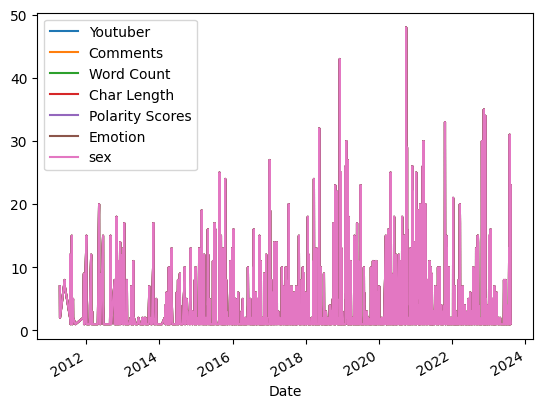

In [109]:
female_pos.groupby('Date').count().plot()

In [125]:
female_neu.groupby('Date').count()#['Youtubers']#.plot(figsize = (20, 3))

,Youtuber,Comments,Word Count,Char Length,Polarity Scores,Emotion,sex
Date,,,,,,,
2011-04-13,12,12,12,12,12,12,12
2011-04-14,4,4,4,4,4,4,4
2011-04-16,1,1,1,1,1,1,1
2011-05-31,5,5,5,5,5,5,5
2011-06-01,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
2023-07-29,1,1,1,1,1,1,1
2023-08-04,1,1,1,1,1,1,1
2023-08-06,1,1,1,1,1,1,1


In [187]:
male

,Youtuber,Comments,Date,Word Count,Char Length,Polarity Scores,Emotion,sex
0,mrbeast gaming,definitely videos pulls someone loosing judge ...,2022-04-26,13,83,"{'roberta_neg': 0.010977927, 'roberta_neu': 0....",2,M
1,mrbeast gaming,mad respect guy saidbr “d e r h e e r”,2021-07-28,11,38,"{'roberta_neg': 0.21114512, 'roberta_neu': 0.7...",1,M
2,mrbeast gaming,person who’s family owns dairy farm works dfa ...,2022-07-15,12,77,"{'roberta_neg': 0.0031857525, 'roberta_neu': 0...",2,M
3,mrbeast gaming,said “i need tell dad” really happy 🤣😅✨,2021-07-31,8,39,"{'roberta_neg': 0.0028714598, 'roberta_neu': 0...",2,M
4,mrbeast gaming,going lie chandler karl’s farm really good wou...,2022-04-19,11,63,"{'roberta_neg': 0.005520399, 'roberta_neu': 0....",2,M
...,...,...,...,...,...,...,...,...
9282,georgenotfound,fact they39ve friends long without george know...,2022-10-04,13,86,"{'roberta_neg': 0.0059320154, 'roberta_neu': 0...",2,M
9283,georgenotfound,can’t believe actually met insane can’t imagin...,2023-03-04,13,90,"{'roberta_neg': 0.4107132, 'roberta_neu': 0.47...",1,M
9284,georgenotfound,one hand happy guysbron hand don’t give stans ...,2023-06-18,9,51,"{'roberta_neg': 0.07846605, 'roberta_neu': 0.5...",1,M
9285,georgenotfound,it39s going even sad goes,2023-06-10,5,25,"{'roberta_neg': 0.84327036, 'roberta_neu': 0.1...",0,M


<Axes: ylabel='Youtuber'>

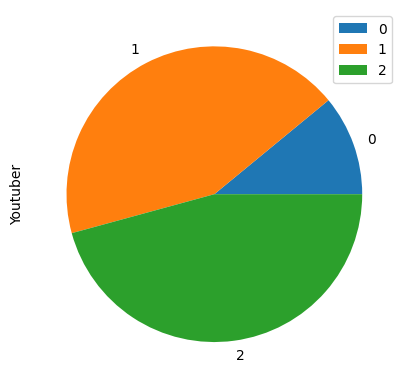

In [189]:
male.groupby('Emotion').count().plot(y = 'Youtuber', kind = 'pie')

<Axes: ylabel='Youtuber'>

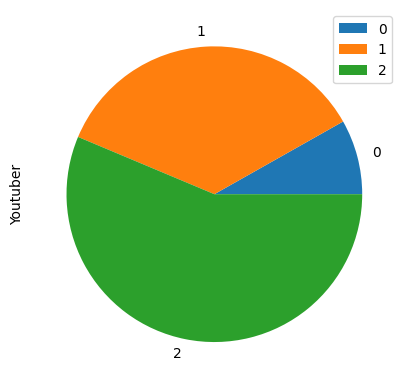

In [190]:
female.groupby('Emotion').count().plot(y = 'Youtuber', kind = 'pie')